# Coffee Sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_excel(r"C:\Projects & Datas\Coffee_ShopeSales Excel\Coffee Shop Sales.xlsx")

# Data Analysing

In [3]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
df.tail()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [5]:
df.shape

(149116, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [7]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [8]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [9]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [10]:
# Convert transaction_time to hour
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour


In [11]:
# Create Total Sales Column
df['total_sales'] = df['transaction_qty'] * df['unit_price']

In [12]:
# Aggregate Data for Peak Hours
hourly_sales = df.groupby('transaction_time')['transaction_qty'].sum().reset_index()

In [13]:
# Aggregate Data for Busiest Store Locations
store_sales = df.groupby('store_location')['transaction_qty'].sum().reset_index()

# Encoding

In [14]:
# Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Apply encoding to categorical columns
df['store_location'] = encoder.fit_transform(df['store_location'])
df['product_category'] = encoder.fit_transform(df['product_category'])
df['product_type'] = encoder.fit_transform(df['product_type'])
df['product_detail'] = encoder.fit_transform(df['product_detail'])

# Scaling

In [15]:
# Select Features and Target
X = df[['transaction_time', 'store_location', 'unit_price', 'transaction_qty']]
y = df['total_sales']

In [16]:
from sklearn.preprocessing import MinMaxScaler
# MinMax Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

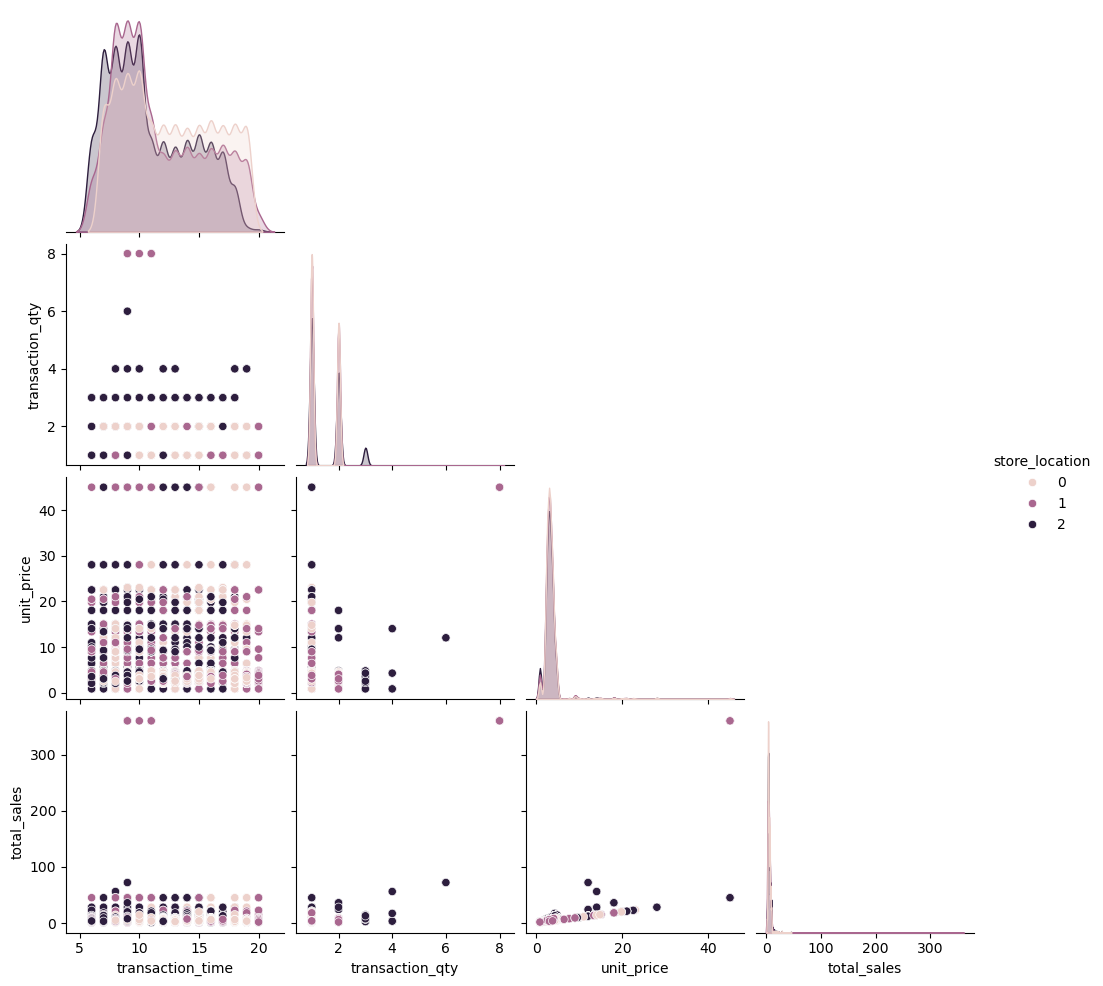

In [18]:
# Select relevant numerical columns
num_cols = ['transaction_time', 'transaction_qty', 'unit_price', 'total_sales']

# Pairplot with hue (e.g., store_location)
sns.pairplot(df[num_cols + ['store_location']], hue='store_location', diag_kind='kde', corner=True)
plt.show()

# ML

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [20]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [21]:
# Tinrain XGBoost Model
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
# Predictions
y_pred = xgb_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:

print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")

Mean Squared Error: 8.734642077957771e-05
R-Squared Score: 0.9999931154033143


C:\Users\Asus\AppData\Local\Temp\ipykernel_7544\4113509653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales['transaction_time'], y=hourly_sales['transaction_qty'], palette="coolwarm")


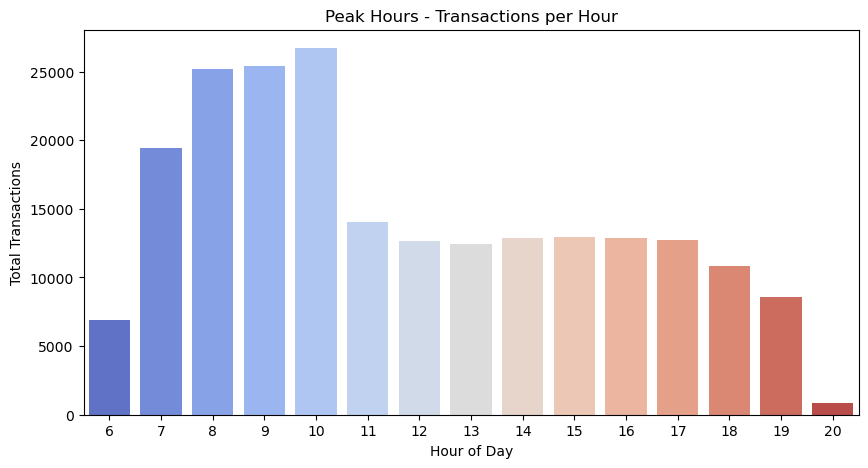

In [25]:
# Identify Peak Hours
plt.figure(figsize=(10,5))
sns.barplot(x=hourly_sales['transaction_time'], y=hourly_sales['transaction_qty'], palette="coolwarm")
plt.title("Peak Hours - Transactions per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Transactions")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_7544\34733448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales['store_location'], y=store_sales['transaction_qty'], palette="viridis")


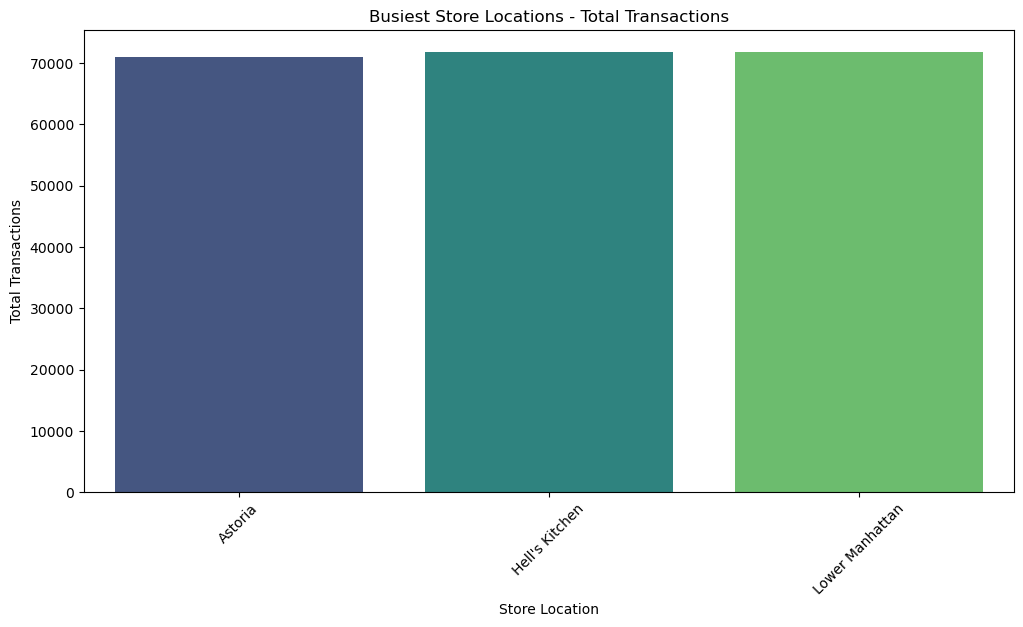

In [26]:
# Identify Busiest Store Locations
plt.figure(figsize=(12,6))
sns.barplot(x=store_sales['store_location'], y=store_sales['transaction_qty'], palette="viridis")
plt.title("Busiest Store Locations - Total Transactions")
plt.xlabel("Store Location")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()

## 🔹 Suggestions for Business Improvement
### 1️⃣ Optimize Staffing During Peak Hours
→ Use peak hour insights to schedule staff effectively.
### 2️⃣ Increase Promotions for Low-Sales Hours
→ Run discounts during non-peak hours to boost sales.
### 3️⃣ Invest in High-Performing Store Locations
→ Expand or improve services in top-selling locations.
### 4️⃣ Seasonal & Holiday Impact
→ Consider adding weekday vs. weekend sales trends for deeper insights.

# 📌 Summary 
This ML model helps predict sales trends, identify peak business hours, and determine the most successful store locations. With a 99.99% R² score, the model can be used to optimize marketing, staffing, and inventory decisions.